In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

In [3]:
hf = h5py.File('gammaray_lab4.h5', 'r')
hf.keys()
data = np.array(hf.get('data'))

#### Problem 1
In this problem we are looking at the data from a gamma-ray satellite orbiting in low Earth orbit. It takes a reading of the number of particles detected every 100 milliseconds, and is in an approximately 90 minute orbit. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays.
As with most data, there are 'features.' Your lab instructor has helpfully incorporated the meta-data into your data file.
##### 1) Down load the data from the course website (gammaray_lab4.h5), and import it into your working environment. The data has 4 columns and more than 25 million rows. The columns are time (in gps seconds), Solar phase (deg) showing the position of the sun relative to the orbit, Earth longitude (deg) giving the position of the spacecraft relative to the ground, and particle counts. Make a few plots, generally exploring your data and making sure you understand it. Give a high level description of the data features you see. Specifically comment on whether you see signal contamination in your data, and how you plan to build a background pdf().


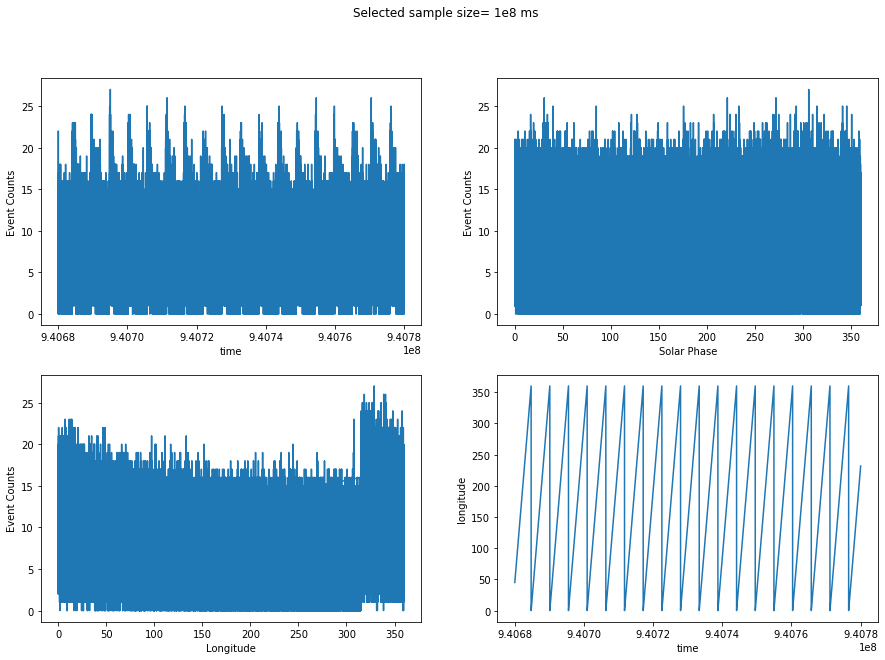

In [143]:
f, ax = plt.subplots(2, 2, figsize=(15, 10))
n=1000000
ax[0][0].plot(data[0,0:n],data[3,0:n]) #time
ax[0][0].set_xlabel("time")
ax[0][0].set_ylabel("Event Counts")
ax[0][1].plot(data[1,0:n],data[3,0:n])
ax[0][1].set_xlabel("Solar Phase")
ax[0][1].set_ylabel("Event Counts")
ax[1][0].plot(data[2,0:n],data[3,0:n])
ax[1][0].set_xlabel("Longitude")
ax[1][0].set_ylabel("Event Counts")
ax[1][1].plot(data[0,0:n],data[2,0:n])
ax[1][1].set_xlabel("time")
ax[1][1].set_ylabel("longitude")
f.suptitle("Selected sample size= 1e8 ms");

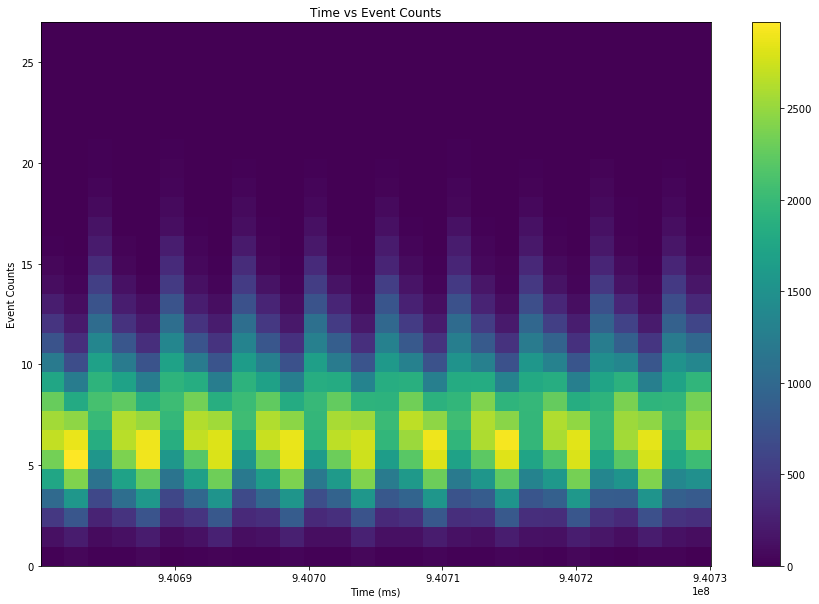

In [144]:
plt.hist2d(data[0,0:500000],data[3,0:500000],bins=28)
plt.xlabel("Time (ms)")
plt.ylabel("Event Counts")
plt.title("Time vs Event Counts")
plt.colorbar();


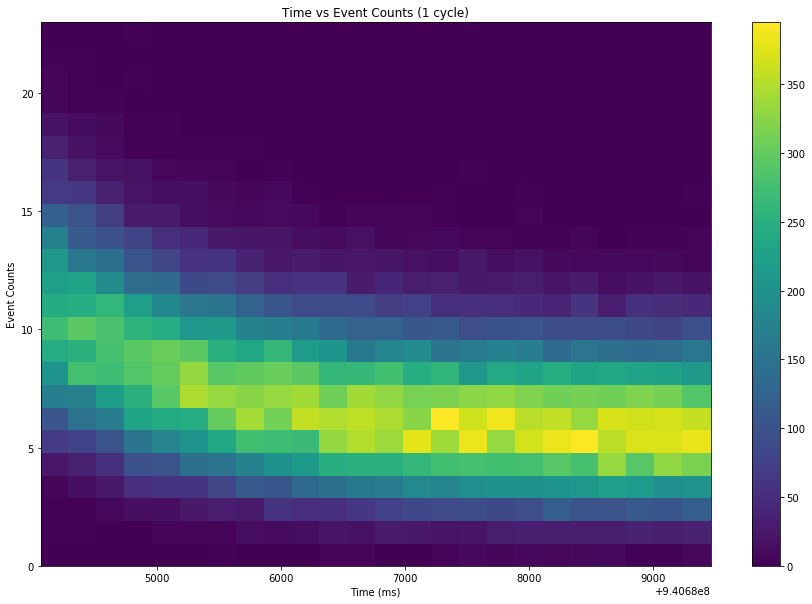

In [145]:

plt.hist2d(data[0][40500:40500+54000],data[3][40500:40500+54000],bins=24)
plt.xlabel("Time (ms)")
plt.ylabel("Event Counts")
plt.title("Time vs Event Counts (1 cycle)")
plt.colorbar();



The background varied with time (1000ms for a cycle) and longitude periodically(360 degree for a cycle). The mean of the distribution seems to decrease exponentially within a cycle.

##### 3) Create a model for the background that includes time dependence, and explicitly compare your model to the data. How good is your model of the background?

First, we will fit a exponential function to reproduce the decay of counts in each 90-minute period. 
The distribution we will look at is the occurances of cosmic ray counts per 100 ms in a total of one minute (in another word, we will study how the distribution changes from minute to minute in the 90-minute cycle). 
Figure below is plotting the mean value of the distribution of each minute in the cycle.

The data is fitted with a exponential function (5.542e^(-0.045x))+5.728


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


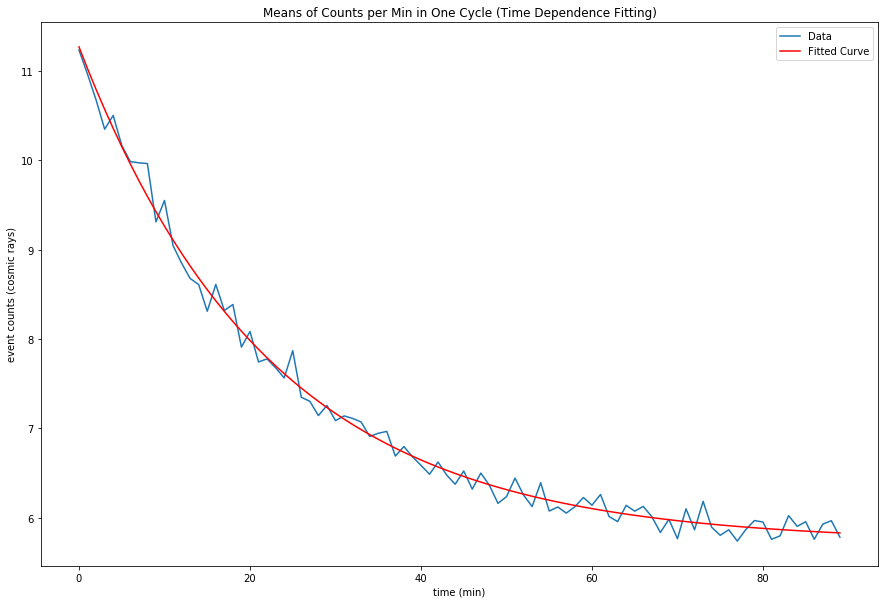

In [146]:
print("The data is fitted with a exponential function ({:.3f}e^(-{:.3f}x))+{:.3f}".format(popt[0],popt[1],popt[2]))



n=40500
m=600
mu=[]

for i in range(90):
    mu.append(np.mean(data[3][n+(m*i):n+(m*(i+1))]))

    
t=np.arange(90)
plt.plot(t,mu,label="Data ")

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, t, mu)

plt.plot(t, func(t, *popt), 'r-', label="Fitted Curve")

plt.xlabel('time (min)')
plt.ylabel('event counts (cosmic rays)')
plt.title('Means of Counts per Min in One Cycle (Time Dependence Fitting)')

plt.legend()
plt.show()





Next, we will fit a Poisson distribution to the distribution of first minute of the cycle.

ample from 15 minutes out of the 90-minute cycle, with each plot showing the distribution of cosmic rays per 100 ms in one minute)The data is fitted with a poisson distribution with mu= 11.16. 


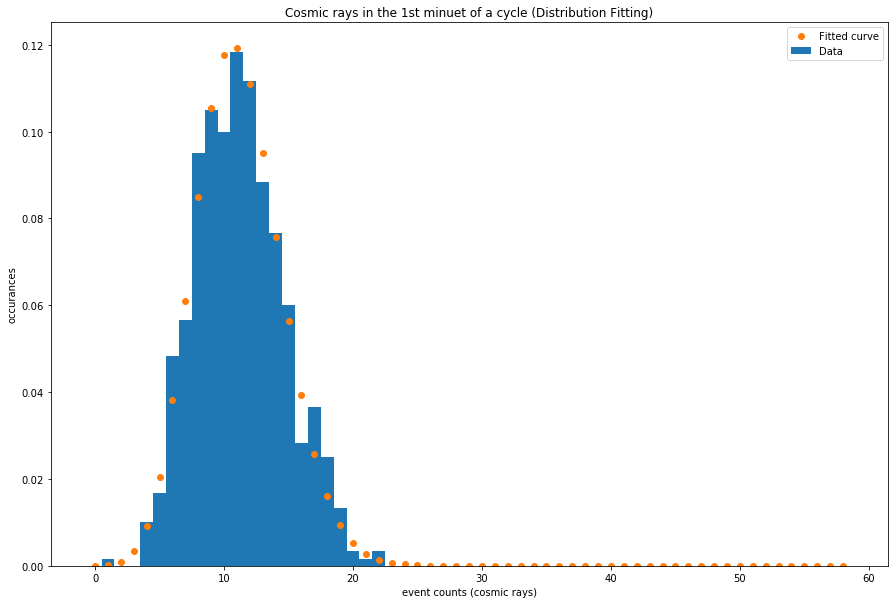

In [5]:

bins = np.arange(60) - 0.5
entries, bin_edges, patches = plt.hist(data[3][40500:40500+600], bins=bins, density=True, label='Data')

# calculate bin centers
bin_mid = 0.5 * (bin_edges[1:] + bin_edges[:-1])


def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)


# fit with curve_fit
par, cov = curve_fit(fit_function, bin_mid, entries)

plt.plot(
    bin_mid,
    poisson.pmf(bin_mid, *par),
    marker='o', linestyle='',
    label='Fitted curve',
)
plt.legend()
plt.xlabel('event counts (cosmic rays)')
plt.ylabel('occurances')
plt.title('Cosmic rays in the 1st minuet of a cycle (Distribution Fitting)');

print("ample from 15 minutes out of the 90-minute cycle, with each plot showing the distribution of cosmic rays per 100 ms in one minute)The data is fitted with a poisson distribution with mu= {:.2f}. ".format(*par))




Finally, we will combine the exponential function with the Poisson distribution and compare the fit result wiht the original data.

Below is plotting sampple from 15 minutes out of the 90-minute cycle, with each plot showing the distribution of cosmic rays per 100 ms in one minute. The blue histograms show the data, and the orange dots show the fitted result.

Test the time-dependent fit model with the data.


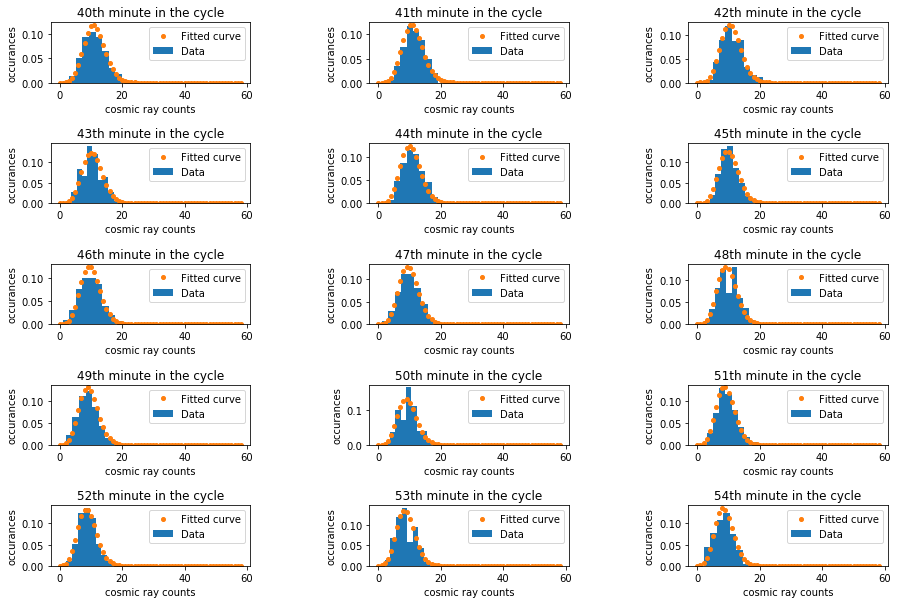

In [43]:

row = 5
col = 3

print('Test the time-dependent fit model with the data.')

t_start=40
f, axs = plt.subplots(row, col, figsize=(15, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.6, hspace=1)
for i in range(0,row ):
    for j in range(0, col):
        ax = axs[i][j]
        t_min= (i*3)+j
        ax.set_xlabel('cosmic ray counts')
        ax.set_ylabel('occurances')
        ax.hist(data[3][40500+(t_min*600):40500+(600*(t_min+1))],density=True,label='Data')
        mu=5.54 * np.exp(-0.0449 * t_min) + 5.73
        ax.plot(bin_mid,poisson.pmf(bin_mid,mu),'o',ms=4, label='Fitted curve')
        ax.legend()
        ax.set_title('{:d}th minute in the cycle'.format(t_start+t_min))

        
    

As we can see from the plots above, the model works quite well for the distribution as time varies. 

In summary: I fit the distribution of occurances of cosmic ray counts in each minute. the fit model is a poisson distribution with mu= 11.16, and mu= (5.542e^(-0.045t))+5.728, where t is the index of minute of the cycle.

4) Because the background varies, your discovery sensitivity threshold (how many particles you would need to see) also varies. What is the '5-sigma' threshold for a 100 millisecond GRB at different times?

In [38]:
def threshold(t):
    mu=5.54 * np.exp(-0.0449 * t) + 5.73
    th= float(stats.poisson.ppf(stats.norm.cdf(5),mu=mu))
    print('Within a 90-minute cycle, at t t={:.0f} (min), the "5 sigma" threshold is {:.0f}'.format(t,th))
threshold(1)
threshold(5)
threshold(20)
threshold(90)

Within a 90-minute cycle, at t t=1 (min), the "5 sigma" threshold is 31
Within a 90-minute cycle, at t t=5 (min), the "5 sigma" threshold is 30
Within a 90-minute cycle, at t t=20 (min), the "5 sigma" threshold is 26
Within a 90-minute cycle, at t t=90 (min), the "5 sigma" threshold is 21


As t get bigger in a cycle, the 5 sigma threshold decreases.

In [39]:
hf.close()

##### 2. In this problem we are going to look at a stack of telescope images (again simulated). We have 10 images, but you and your lab partner will be looking for different signals. One of you will be looking for the faintest stars, while the other will be looking for a transient (something like a super novae that only appears in one image). Flip a coin to determine which of you is pursuing which question.

##### 1) Dowload the data from images.h5. This is a stack of 10 square images, each 200 pixels on a side.

In [40]:
hf2 = h5py.File('images.h5', 'r')
hf2.keys()


<KeysViewHDF5 ['image1', 'imagestack']>

In [41]:
image1 = np.array(hf2.get('image1'))
imagestack = np.array(hf2.get('imagestack'))
print(image1.shape)
#plt.hist2d(image1[1][:],image1[:][1],bins=100)

(200, 200)


##### 2) Explore the data. Is there signal contamination? Is the background time dependent? Is it consistent spatially? Develop a plan to calculate your background pdf().


In [49]:
from PIL import Image
row =5
col= 2
for i in range(0,row):
    for j in range(0, col):
        ax = axs[i][j]
        k=(i*2)+j
        ax.set_title('image {:.0f}'.format(k))
        ax.imshow(imagestack[:,:,k])
        plt.show()

# print(np.shape(image))
# plt.xlim([0,200])
# plt.imshow(image)


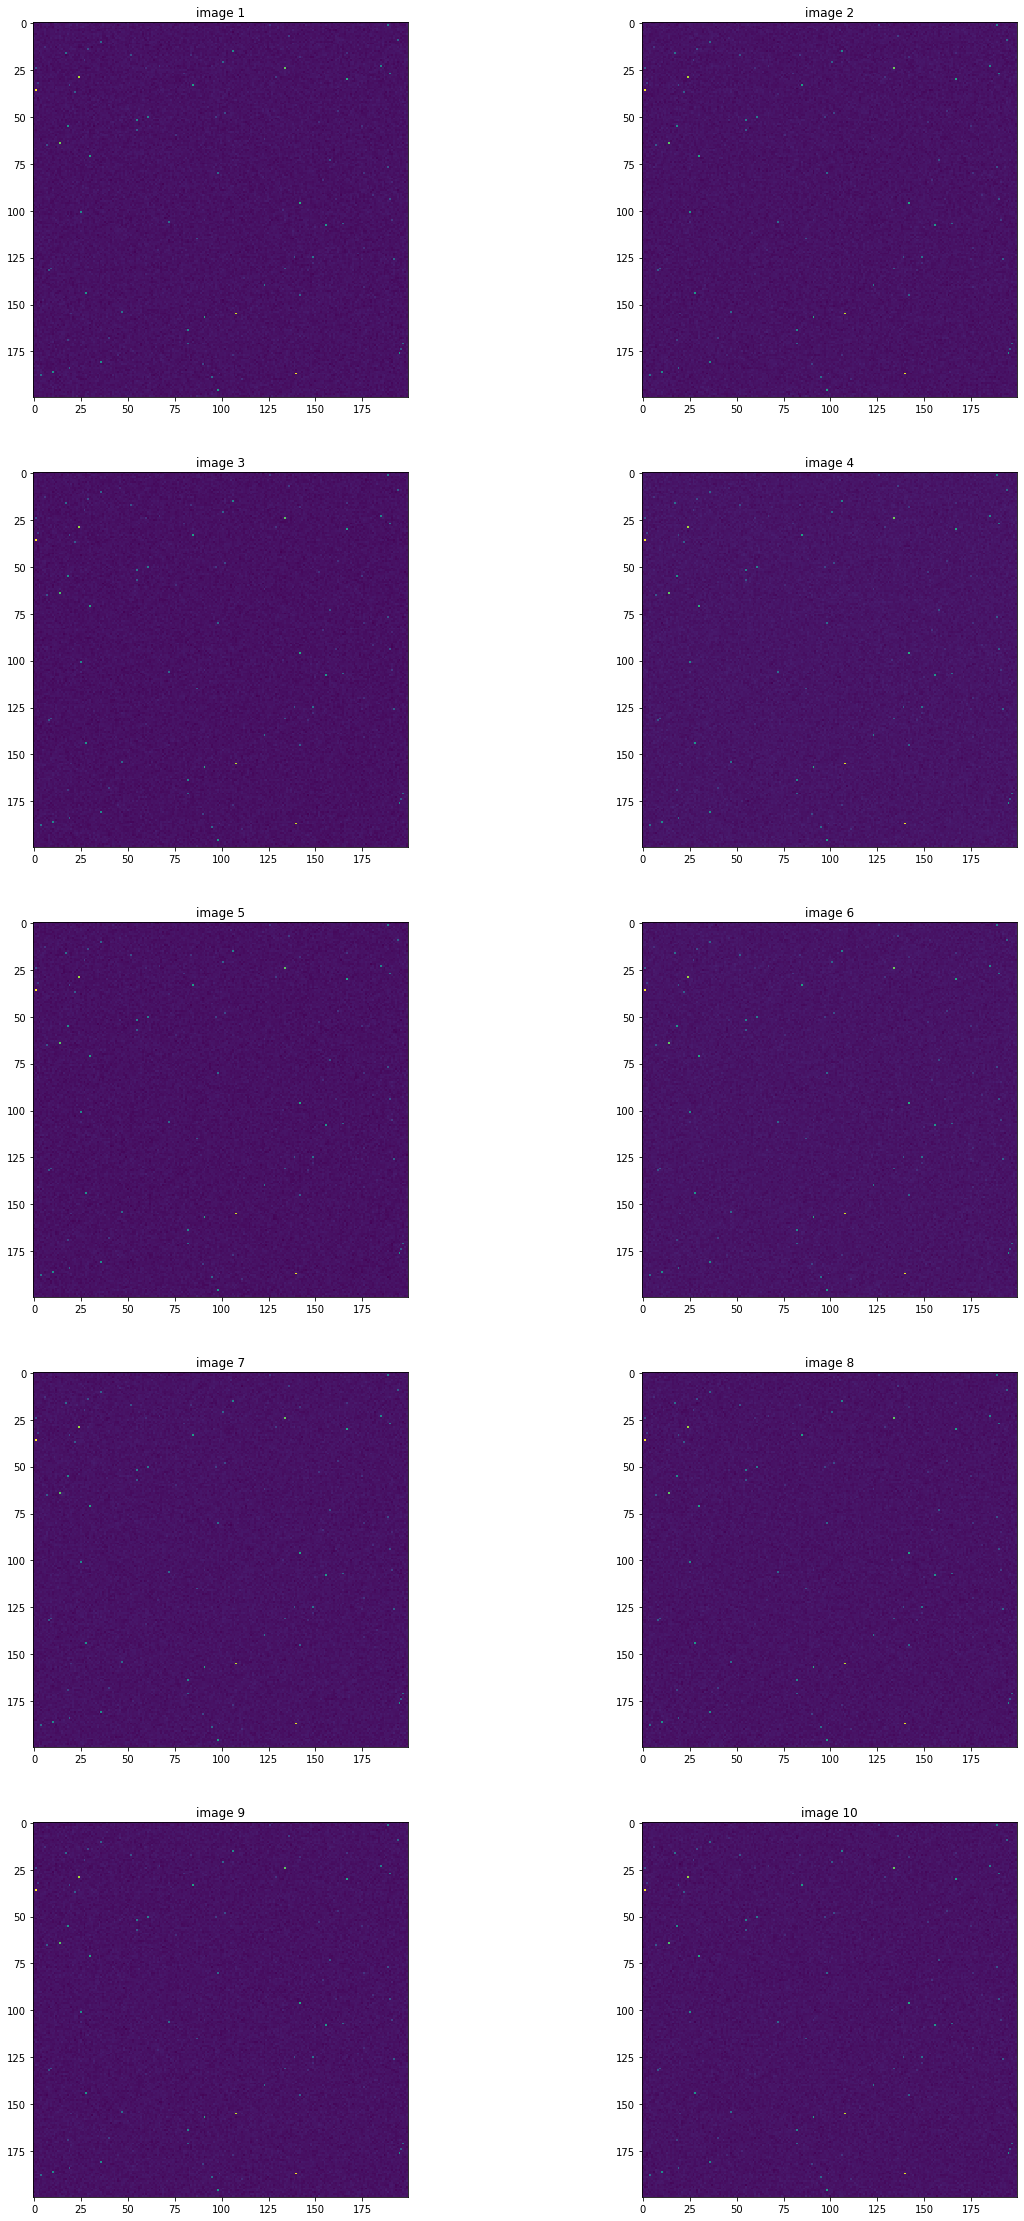

In [67]:
from PIL import Image
f, ax = plt.subplots(5, 2, figsize=(20, 40))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.2, hspace=0.2)
ax[0][0].imshow(imagestack[:,:,0])
ax[0][1].imshow(imagestack[:,:,1])
ax[1][0].imshow(imagestack[:,:,2])
ax[1][1].imshow(imagestack[:,:,3])
ax[2][0].imshow(imagestack[:,:,4])
ax[2][1].imshow(imagestack[:,:,5])
ax[3][0].imshow(imagestack[:,:,6])
ax[3][1].imshow(imagestack[:,:,7])
ax[4][0].imshow(imagestack[:,:,8])
ax[4][1].imshow(imagestack[:,:,9])


ax[0][0].set_title('image 1')
ax[0][1].set_title('image 2')
ax[1][0].set_title('image 3')
ax[1][1].set_title('image 4')
ax[2][0].set_title('image 5')
ax[2][1].set_title('image 6')
ax[3][0].set_title('image 7')
ax[3][1].set_title('image 8')
ax[4][0].set_title('image 9')
ax[4][1].set_title('image 10');


There are signal contamination from the stars. The background appears to time independent and spatially consistent. Because the star brightness should be consistent throughout the images, we can subtrace image to eliminate the signal contamination, and then the background noises should fit to a Gaussian distribution.

##### 3) Using your background distribution, hunt for your signal (either faint stars, or a transient). Describe what you find.

The goal is try to find transient stars. Different from regular stars, transient stars do not appear in all 10 images. Therefore, we subtract every two consecutive images.

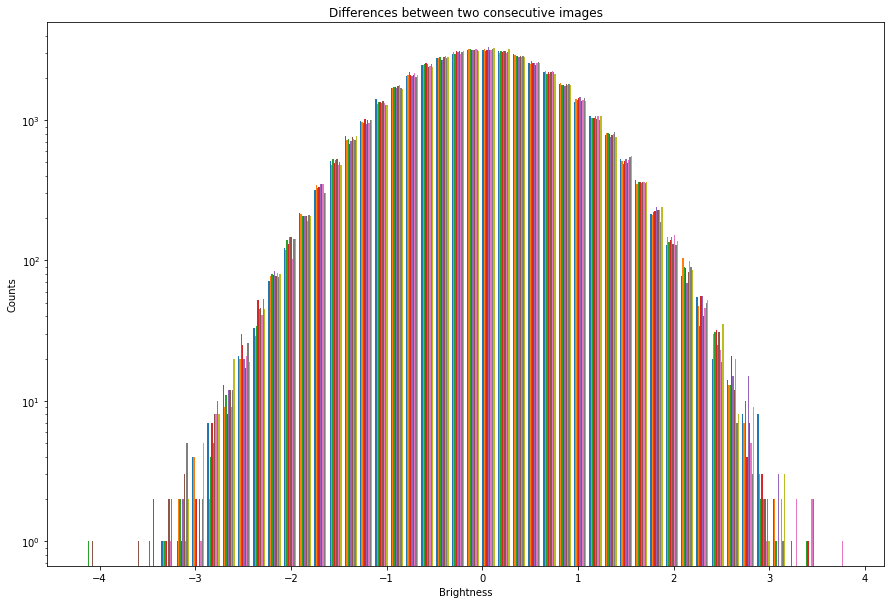

In [203]:
subtract=[]
for i in range(9):
    subtract.append(np.ravel(imagestack[:,:,i+1])-np.ravel(imagestack[:,:,i]))

plt.hist(subtract, bins=50)
plt.xlabel('Brightness')
plt.ylabel('Counts')
plt.title('Differences between two consecutive images')
plt.yscale('log');

Because the background noise value fluctuate around zero, summing them should gives an average distribution of the background.

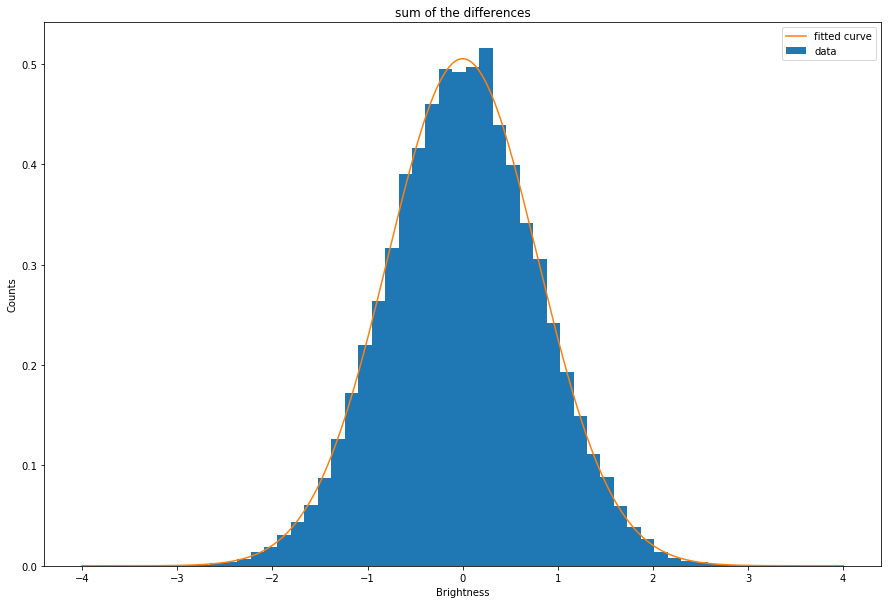

In [205]:
sum_diff=np.zeros(40000)
for i in range(9):
    sum_diff+= subtract[i]
    
plt.hist(sum_diff, bins=50,density=True, label="data")
plt.xlabel('Brightness')
plt.ylabel('Counts')
plt.title('sum of the differences')
x=np.linspace(-4,4,1000)
plt.plot(x,stats.norm.pdf(x,loc = 0., scale = np.std(sum_diff)),label="fitted curve")
plt.legend()
#plt.yscale('log');

In [178]:
threshold= stats.norm.ppf(stats.norm.cdf(5),scale = np.std(sum_diff))
print('The 5 sigma threshold of this distribution is {:.2f}'. format(threshold))


The 5 sigma threshold of this distribution is 3.95


Apply this threshold onto the differences between two images. 

In [210]:
transient=[[],[],[]]

for i in range(9):
    for j in range(4000):
        if subtract[i][j]>= threshold:
            print(j)
            transient[0].append(i+1)
            transient[1].append(j)
            transient[1].append(np.ravel(imagestack[:,:,i+1][j]))

print(transient)

[[], [], []]


There is no signal greater than the 5 sigma threshold, therefore we cannot claim any discovery of transient stars.

##### 4) You and your lab partner had different pdf(), but were using the same data. Explore why this is.

The pdf are different because we are looking for different things. I am looking for transient stars and my lab partners are looking for faint stars. While I am trying to look for significant changes between two images, my lab partners are looking for background distribution